## Seoul Bike Data

This dataset was downloaded from the UCI public dataset repository as a CSV file:

https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

This particular dataset contains 8,760 records or rows of data. Each row has with it 14 attributes or columns that contain various information for each record. This dataset contains Integers, Real valued numbers and categorical data. The associated task is regression purposes, is to predict the number of bikes required at each hour of the day so the city can have a stable supply of rental bikes for the population. 

### Attribute Information

**Date** : year-month-day

**Rented Bike count** - Count of bikes rented at each hour

**Hour** - Hour of he day

**Temperature**-Temperature in Celsius

**Humidity** - %

**Windspeed**- m/s

**Visibility** - 10m

**Dew point temperature** - Celsius

**Solar radiation** - MJ/m2

**Rainfall** - mm

**Snowfall** - cm

**Seasons** - Winter, Spring, Summer, Autumn

**Holiday** - Holiday/No holiday

**Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

The target variable is the "Rented Bike Count", therefore this is a regression problem since the target variable is continous

In [28]:
#import libraries needed
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np

In [3]:
#load the seoul bike dataset into a pandas dataframe object
df = pd.read_csv("Datasets/SeoulBikeData.csv", encoding= 'unicode_escape')

In [4]:
#display the first five rows of the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#check for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
#summary statistics
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
#technical information on the columns(attributes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

c:\users\mia\miniconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


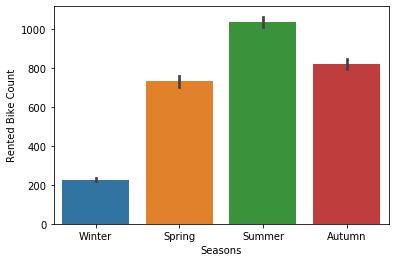

In [8]:
#season where most bikes are rented
import seaborn as sns
sns.barplot(df["Seasons"], df["Rented Bike Count"])

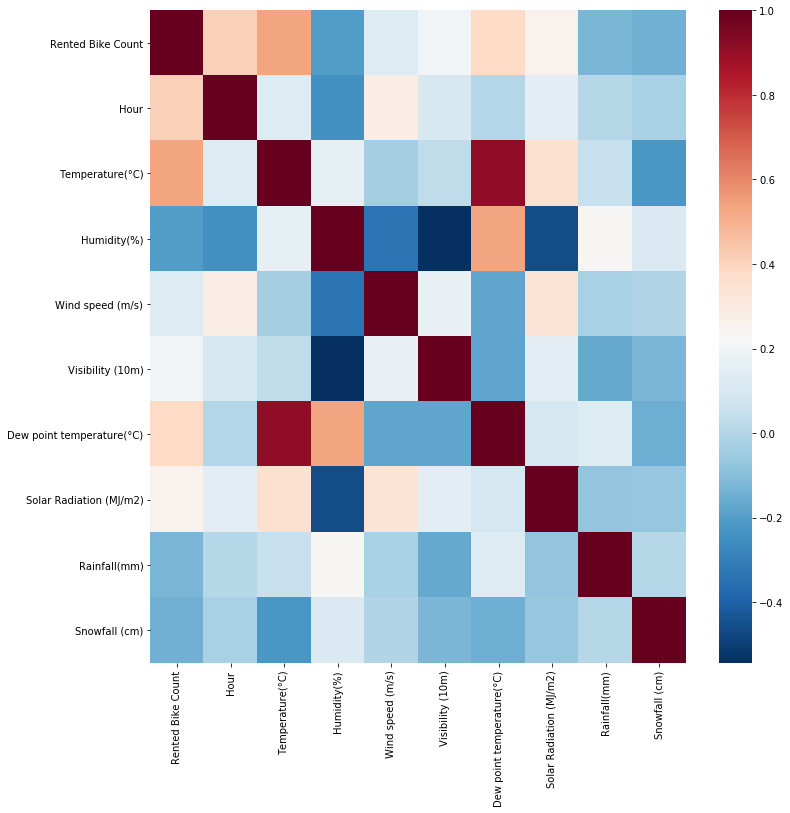

In [10]:
#variable correlation map, coefficient of determination(pearsons) r
#temperature has a high correlation with target variable
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='RdBu_r')

In [11]:
#drop date column(not sure how to work with a date attribute)
df.drop(columns=["Date"], axis=1, inplace=True)

In [13]:
#Y is our target variable
y = df["Rented Bike Count"]

In [16]:
#X is all of our features(predictors)
X = df.drop(columns=["Rented Bike Count"], axis=1)

In [18]:
#Encode categorical features such as(seasons, holiday, functioning day)
X = pd.get_dummies(X, columns=["Seasons", "Holiday", "Functioning Day"])

In [20]:
#split the dataset into random training and testing sets, 80% is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [22]:
X_train.shape

(7008, 17)

In [23]:
X_test.shape

(1752, 17)

In [24]:
y_train.shape

(7008,)

In [25]:
y_test.shape

(1752,)

In [29]:
#construct a DecisionTreeClassifier model and fit it to the training data
#by default, sklearn uses the gini coefficient instead of entropy for
#splitting features with most information gain(reduce uncertainty or randomness)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
#Test the fitted decision tree model on testing X
y_pred = dt.predict(X_test)

In [31]:
#model evaluation metrics for decisiontreeregressor
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 182.16095890410958
Mean Squared Error: 98147.72945205479
Root Mean Squared Error: 313.28538020797396
